In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#importing seaborn for statistical plots
import seaborn as sns
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [38]:
A=pd.DataFrame({'exp':[2.5,3.0,5.7,4.8,7.0,12,8],'g':[1,0,1,0,0,1,0],'sal':[6500,8000,4000,12000,10000,15000,6000]})


In [39]:
A

,exp,g,sal
0,2.5,1,6500
1,3.0,0,8000
2,5.7,1,4000
3,4.8,0,12000
4,7.0,0,10000
5,12.0,1,15000
6,8.0,0,6000


In [40]:
x=A.iloc[:, :-1]
x

,exp,g
0,2.5,1
1,3.0,0
2,5.7,1
3,4.8,0
4,7.0,0
5,12.0,1
6,8.0,0


In [41]:
y=A.iloc[:,-1]
y

0     6500
1     8000
2     4000
3    12000
4    10000
5    15000
6     6000
Name: sal, dtype: int64

In [17]:
m1=LinearRegression()
m1.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
ypredict=m1.predict(x)

In [19]:
ypredict

array([ 5640.4109589 ,  7176.16761946,  7801.99007658,  8392.05587315,
        9878.14151656, 12057.59896451, 10553.63499083])

In [20]:
B=pd.DataFrame({'exp':[2.5,3.0,5.7,4.8,7.0,12,8],'g':[0,1,0,1,1,0,1],'sal':[6500,8000,4000,12000,10000,15000,6000]})
B

,exp,g,sal
0,2.5,0,6500
1,3.0,1,8000
2,5.7,0,4000
3,4.8,1,12000
4,7.0,1,10000
5,12.0,0,15000
6,8.0,1,6000


In [21]:
x1= A.iloc[:,:-1]

In [22]:
y1=A.iloc[:,-1]

In [23]:
x1

,exp,g
0,2.5,1
1,3.0,0
2,5.7,1
3,4.8,0
4,7.0,0
5,12.0,1
6,8.0,0


In [24]:
y1

0     6500
1     8000
2     4000
3    12000
4    10000
5    15000
6     6000
Name: sal, dtype: int64

In [26]:
m2=LinearRegression()
m2.fit(x1,y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
y1predict=m2.predict(x1)

In [28]:
y1predict

array([ 5640.4109589 ,  7176.16761946,  7801.99007658,  8392.05587315,
        9878.14151656, 12057.59896451, 10553.63499083])

In [42]:
new_col= A["g"]*A['exp']

In [43]:
x=pd.concat([x,new_col],axis=1)
x.columns=['exp','g','exp:g']


In [44]:
m3=LinearRegression()
m3.fit(x,y)
y3_predict=m3.predict(x)
y3_predict

array([ 4210.19403624, 10002.65251989,  7452.88200885,  9334.21750663,
        8517.24137931, 13836.92395492,  8145.88859416])

In [45]:
m3.intercept_

11116.710875331557

In [47]:
m3.coef_

array([ -371.35278515, -9439.86681769,  1384.69277659])

In [48]:
new_col1= B["g"]*B['exp']

In [49]:
x1=pd.concat([x1,new_col1],axis=1)
x1.columns=['exp','g','exp:g']


In [50]:
m4=LinearRegression()
m4.fit(x1,y)
y4_predict=m3.predict(x1)
y4_predict

array([  748.46209478, 14156.73084965,  -439.86681769, 15980.74283424,
       18210.09081541, -2779.38936411, 19223.43080685])

In [52]:
m4.intercept_, m4.coef_

(11116.710875331562, array([ 1013.33999144, -9439.86681769, -1384.69277659]))

## Advertising Case Study

In [56]:
adv=pd.read_csv('Advertising-1.csv', index_col=0)

In [57]:
adv.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


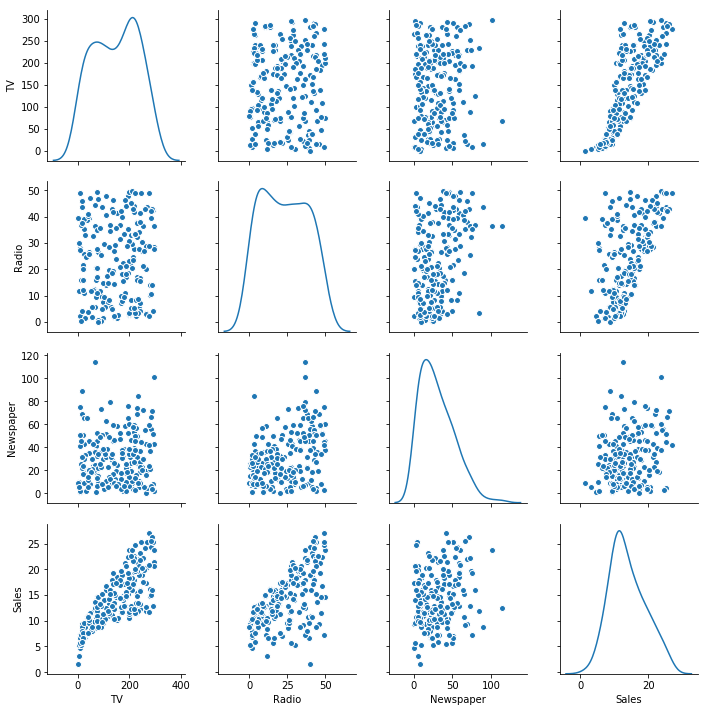

In [60]:
sns.pairplot(adv, diag_kind='kde')

In [62]:
adv.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [63]:
adv['Sales'].describe()

count    200.000000
mean      14.022500
std        5.217457
min        1.600000
25%       10.375000
50%       12.900000
75%       17.400000
max       27.000000
Name: Sales, dtype: float64

In [117]:
x2=adv.iloc[:,:-1]#tv radio newspaper
x21=adv.iloc[:,:-2]#tv radio
x22=adv.iloc[:,:-3]#tv
x22.head()

,TV,Radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8


In [66]:
y2=adv.iloc[:,-1]

In [69]:
model0= LinearRegression() #tv radio newspaper

In [70]:
model0.fit(x2,y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [71]:
ypred=model0.predict(x2)

In [79]:
model0.score(x2,y2)

0.8972106381789521

In [81]:
model1= LinearRegression()

In [82]:
model1.fit(x21, y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [83]:
ypred1=model1.predict(x21)

In [86]:
model1.score(x21,y2)

0.8971942610828956

In [87]:
model2=LinearRegression()

In [88]:
model2.fit(x22,y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [90]:
ypred2=model2.predict(x22)

In [91]:
model2.score(x22,y2)

0.611875050850071

In [92]:
model2.coef_

array([0.04753664])

In [93]:
model2.intercept_

7.032593549127693

In [94]:
tv=(50-model2.intercept_)/model2.coef_
tv

array([903.87974538])

In [95]:
(tv*model2.coef_) + model2.intercept_

array([50.])

to sell 50 cars, company has to spend 903 lakhs or 9.03 cr on tv advertising

In [96]:
# now if the company wants to spend on both tv and radio to sell 50 cars


In [98]:
model1.score(x21,y2)

0.8971942610828956

In [102]:
model1.coef_

array([0.04575482, 0.18799423])

In [101]:
model1.intercept_

2.9210999124051362

In [110]:
adv.drop(['TvRadio'],axis=1)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


In [104]:
adv["TvRadio"]=TvRadio

In [105]:
model4=LinearRegression()

In [122]:
x22=pd.concat([x22,TvRadio],axis=1)
x22.columns=['TV','Radio','TvRadio']

In [124]:
model4.fit(x22, y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [125]:
ypred3= model4.predict(x22)

In [127]:
model4.score(x22,y2)

0.9677905498482523

In [128]:
model4.intercept_

6.750220203075112

In [129]:
model4.coef_

array([0.01910107, 0.02886034, 0.00108649])

In [132]:
(50-(model4.intercept_)+model4.coef_[0]*sum(adv["TV"]) + model4.coef_[1]*sum(adv["Radio"])/model4.coef_[2])

124196.37328080427

In [135]:
x=adv[["TV", "Radio"]]
y=adv[["Sales"]]
x_new=adv[["TV", "Radio", "Newspaper"]]

In [136]:
model0=LinearRegression()


In [137]:
model0.fit(x_new,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [138]:
model0.score(x_new,y)

0.8972106381789521

In [139]:
ypredict= model0.predict(x_new)

In [140]:
rmse= np.sqrt(np.sum((y-ypredict)**2/len(y)))
rmse

Sales    1.66857
dtype: float64

In [141]:
m0=smf.ols("Sales~TV+Radio+Newspaper", adv).fit()


In [143]:
m0.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.9389,0.312,9.422,0.000,2.324,3.554
TV,0.0458,0.001,32.809,0.000,0.043,0.049
Radio,0.1885,0.009,21.893,0.000,0.172,0.206
Newspaper,-0.0010,0.006,-0.177,0.860,-0.013,0.011


In [144]:
m0.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [153]:
ypredict= m0.params[0]+m0.params[1]*adv['TV']+m0.params[2]*adv['Radio']+m0.params[3]*adv['Newspaper']

In [154]:
ypredict.describe()

count    200.000000
mean      14.022500
std        4.942038
min        3.587258
25%       10.013118
50%       13.945978
75%       17.677945
max       24.786870
dtype: float64

In [156]:
pd.DataFrame(ypredict).describe()

,0
count,200.000000
mean,14.022500
std,4.942038
min,3.587258
25%,10.013118
50%,13.945978
75%,17.677945
max,24.786870


In [155]:
rmse0= np.sqrt(np.sum((adv['Sales']-ypredict)**2/len(y)))
rmse0

1.66857014072257

In [157]:
adv.head()

,TV,Radio,Newspaper,Sales,TvRadio
1,230.1,37.8,69.2,22.1,8697.78
2,44.5,39.3,45.1,10.4,1748.85
3,17.2,45.9,69.3,9.3,789.48
4,151.5,41.3,58.5,18.5,6256.95
5,180.8,10.8,58.4,12.9,1952.64


In [158]:
model5=LinearRegression()

In [182]:
XtvRadio=adv[["TV", "Radio", "TvRadio"]]

y=adv[["Sales"]]

In [183]:
model5.fit(XtvRadio,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [184]:
model5.intercept_

array([6.7502202])

In [185]:
model5.coef_

array([[0.01910107, 0.02886034, 0.00108649]])

In [190]:
model5.score(XtvRadio,y)

0.9677905498482523

In [205]:
y2predict= model5.predict(XtvRadio)


In [206]:
y2p=pd.DataFrame(y2predict)


In [207]:
rmse2= np.sqrt(np.sum((y-y2predict)**2/len(y)))


In [208]:
rmse2

Sales    0.934033
dtype: float64

In [210]:
Y2=smf.ols("Sales~TV+Radio+TvRadio",adv).fit()

In [218]:
Y2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Mon, 03 Dec 2018   Prob (F-statistic):          6.68e-146
Time:                        00:30:28   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
Radio          0.0289      0.009      3.241      0.001       0.011       0.046
TvRadio        0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [213]:
Y2.params

Intercept    6.750220
TV           0.019101
Radio        0.028860
TvRadio      0.001086
dtype: float64

In [215]:
y2_predict= (Y2.params[0]+ Y2.params[1]*adv["TV"] + Y2.params[2]*adv["Radio"] + Y2.params[3]*adv["TvRadio"])


In [216]:
rmse02= np.sqrt(np.sum((adv['Sales']-y2_predict)**2/len(y)))


In [217]:
rmse02

0.9340326081773783

In [219]:
mpg_df = pd.read_csv("car-mpg.csv")  

In [221]:
mpg_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [223]:
mpg_df= mpg_df.drop('car_name', axis=1)

In [224]:
mpg_df.shape

(398, 9)

In [225]:
mpg_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,1,0
1,15.0,8,350.0,165,3693,11.5,70,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,0


In [226]:
mpg_df["origin"].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [227]:
mpg_df["origin"]=mpg_df["origin"].replace({1:"American", 2:"Europe",3: "Asian"})

In [228]:
mpg_df = pd.get_dummies(mpg_df, columns=['origin'])

In [229]:
mpg_df.describe()

,mpg,cyl,disp,wt,acc,yr,car_type,origin_American,origin_Asian,origin_Europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.530151,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.499718,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000,1.000000


In [230]:
temp = pd.DataFrame(mpg_df.hp.str.isdigit())


In [233]:
temp[temp['hp']==False]

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [234]:
mpg_df["hp"]

0      130
1      165
2      150
3      150
4      140
5      198
6      220
7      215
8      225
9      190
10     170
11     160
12     150
13     225
14      95
15      95
16      97
17      85
18      88
19      46
20      87
21      90
22      95
23     113
24      90
25     215
26     200
27     210
28     193
29      88
      ... 
368     88
369     88
370     85
371     84
372     90
373     92
374      ?
375     74
376     68
377     68
378     63
379     70
380     88
381     75
382     70
383     67
384     67
385     67
386    110
387     85
388     92
389    112
390     96
391     84
392     90
393     86
394     52
395     84
396     79
397     82
Name: hp, Length: 398, dtype: object

mpg_df=mpg_df.replace('?', np.nan)

In [237]:
mpg_df[mpg_df.isnull().any(axis=1)]

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_American,origin_Asian,origin_Europe
32,25.0,4,98.0,NaN,2046,19.0,71,1,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,0,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,1,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,1,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,1,0,0


In [239]:
mpg_df.median()

mpg                  23.0
cyl                   4.0
disp                148.5
hp                   93.5
wt                 2803.5
acc                  15.5
yr                   76.0
car_type              1.0
origin_American       1.0
origin_Asian          0.0
origin_Europe         0.0
dtype: float64

In [242]:
mpg_df = mpg_df.fillna(mpg_df.median())

In [243]:
mpg_df['hp'].dtype

dtype('O')

In [244]:
mpg_df['hp']=mpg_df['hp'].astype('float64')


In [245]:
mpg_df['hp'].dtype

dtype('float64')

In [246]:
mpg_df.describe()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_American,origin_Asian,origin_Europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,0.530151,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.499718,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,1.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000,1.000000


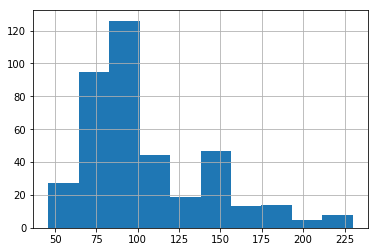

In [247]:
mpg_df.hp.hist()

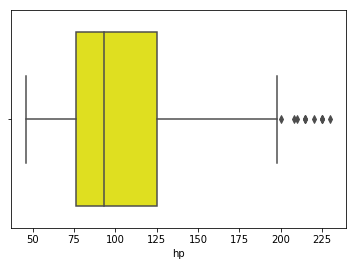

In [248]:
sns.boxplot(mpg_df.hp, color = "yellow", orient = "h")

In [249]:
mpg_df_attr = mpg_df.iloc[:,0:7]


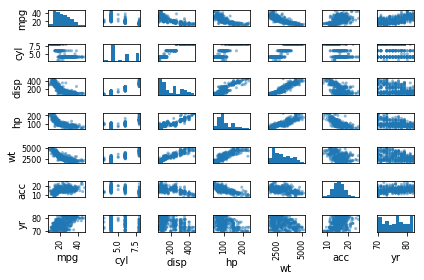

In [250]:
axes = pd.plotting.scatter_matrix(mpg_df_attr)
plt.tight_layout()
plt.savefig('mpg_pairpanel.png')

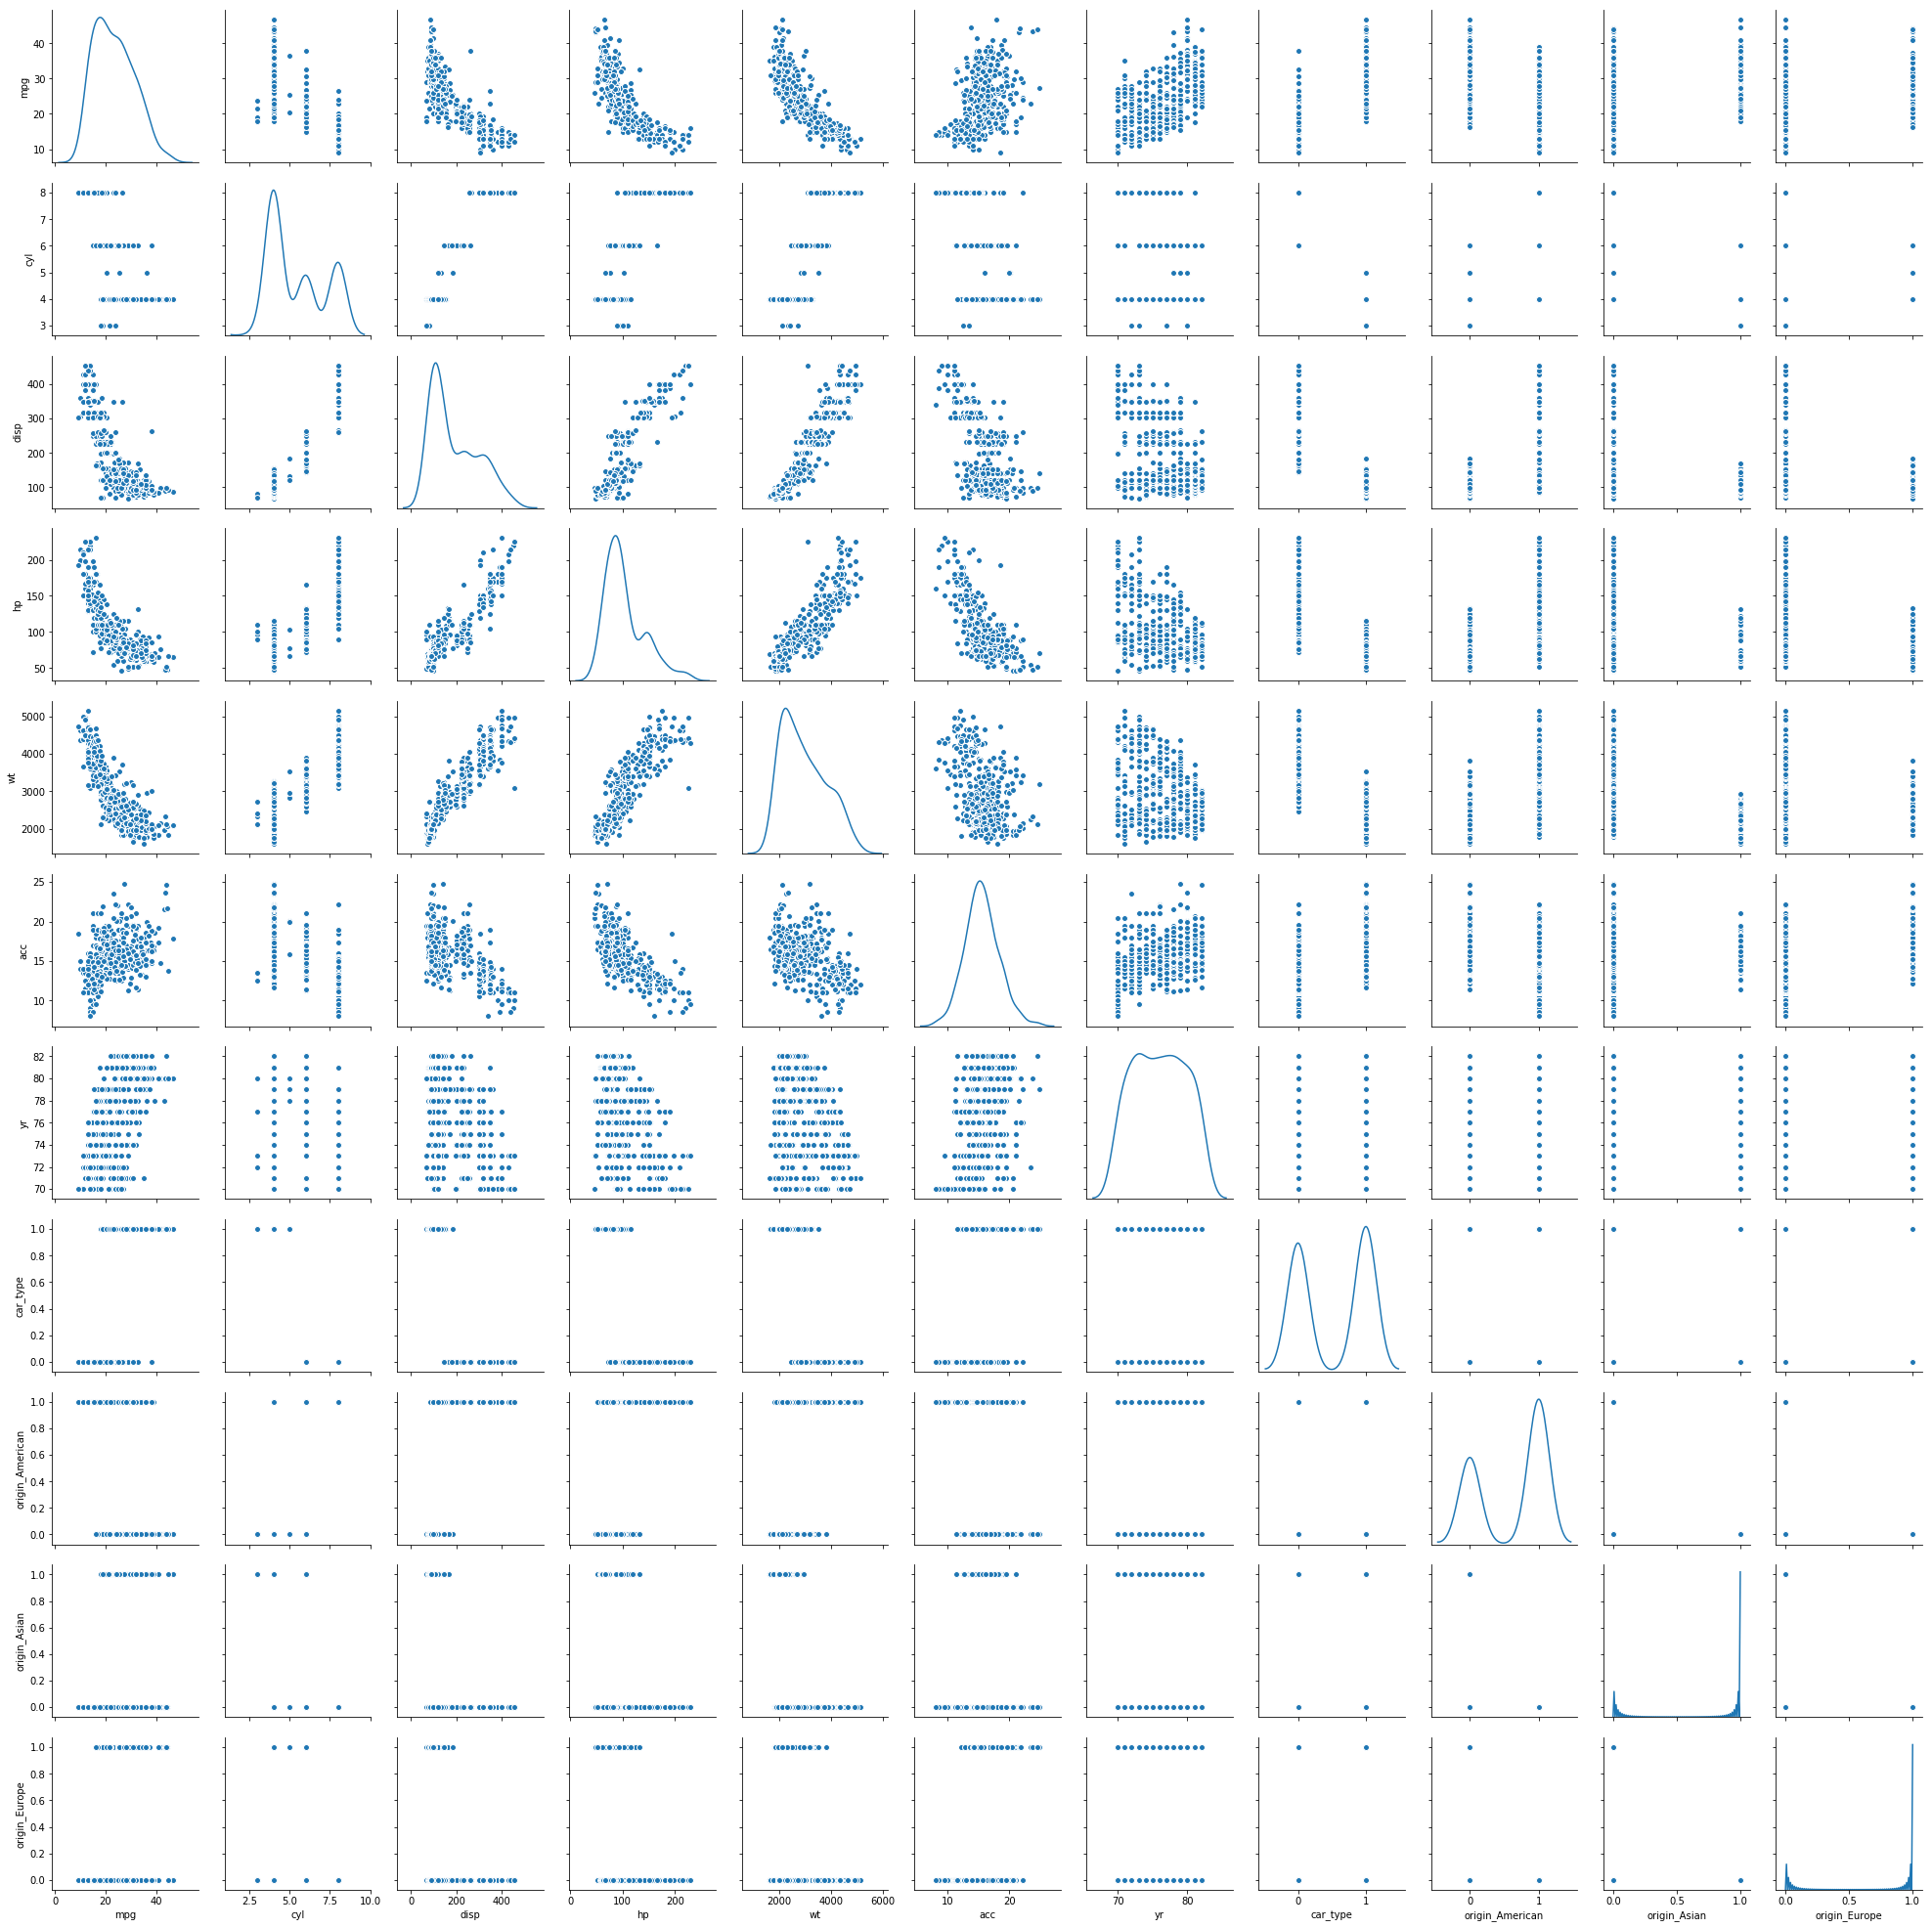

In [251]:
sns.pairplot(mpg_df,diag_kind='kde')

In [306]:
X = mpg_df.drop(['mpg','cyl','car_type' ], axis=1)
X.head()

,disp,hp,wt,acc,yr,origin_American,origin_Asian,origin_Europe
0,307.0,130.0,3504,12.0,70,1,0,0
1,350.0,165.0,3693,11.5,70,1,0,0
2,318.0,150.0,3436,11.0,70,1,0,0
3,304.0,150.0,3433,12.0,70,1,0,0
4,302.0,140.0,3449,10.5,70,1,0,0


In [307]:
Y=mpg_df[['mpg']]

In [254]:
from sklearn.model_selection import train_test_split

In [308]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [309]:
reg_model=LinearRegression()

In [310]:
reg_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [311]:
Yprdict= reg_model.predict(X_test)

In [312]:
reg_model.intercept_

array([-20.43484477])

In [313]:
reg_model.coef_

array([[ 0.02252969, -0.02196202, -0.00734731,  0.05632924,  0.83846658,
        -1.75301234,  0.55101655,  1.20199579]])

In [314]:
for idx,col_name in enumerate(X_train.columns):
    print("The coefficient of {} is {}".format(col_name, reg_model.coef_[0][idx]))

The coefficient of disp is 0.022529693775984547
The coefficient of hp is -0.02196201632885377
The coefficient of wt is -0.007347311214573755
The coefficient of acc is 0.05632924235006808
The coefficient of yr is 0.8384665845096865
The coefficient of origin_American is -1.7530123379049618
The coefficient of origin_Asian is 0.5510165485045037
The coefficient of origin_Europe is 1.201995789400461


In [315]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, reg_model.coef_[0][idx]))

The coefficient for disp is 0.022529693775984547
The coefficient for hp is -0.02196201632885377
The coefficient for wt is -0.007347311214573755
The coefficient for acc is 0.05632924235006808
The coefficient for yr is 0.8384665845096865
The coefficient for origin_American is -1.7530123379049618
The coefficient for origin_Asian is 0.5510165485045037
The coefficient for origin_Europe is 1.201995789400461


In [316]:
intercept = reg_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -20.434844767796857


In [317]:
reg_model.score(X_test,y_test)

0.8415081730288692

In [318]:
y_pred = reg_model.predict(X_test)

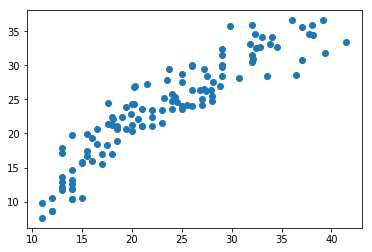

In [319]:
plt.scatter(y_test, y_pred)

In [277]:
# How do we improve the model? the R^2 is .844, how do we improve it
# The indpendent attributes have different units and scales of measurement 
# It is always a good practice to scale all the dimensions using z scores or someother methode to address the problem of different scales 


In [320]:

from sklearn import preprocessing

# scale all the columns of the mpg_df. This will produce a numpy array
mpg_df_scaled = preprocessing.scale(mpg_df)

In [321]:
mpg_df_scaled

array([[-0.7064387 ,  1.49819126,  1.0906037 , ...,  0.77355903,
        -0.49764335, -0.46196822],
       [-1.09075062,  1.49819126,  1.5035143 , ...,  0.77355903,
        -0.49764335, -0.46196822],
       [-0.7064387 ,  1.49819126,  1.19623199, ...,  0.77355903,
        -0.49764335, -0.46196822],
       ...,
       [ 1.08701694, -0.85632057, -0.56103873, ...,  0.77355903,
        -0.49764335, -0.46196822],
       [ 0.57460104, -0.85632057, -0.70507731, ...,  0.77355903,
        -0.49764335, -0.46196822],
       [ 0.95891297, -0.85632057, -0.71467988, ...,  0.77355903,
        -0.49764335, -0.46196822]])

In [322]:
#convert the numpy array back into a dataframe 

mpg_df_scaled = pd.DataFrame(mpg_df_scaled, columns=mpg_df.columns)

In [323]:
mpg_df_scaled.head()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_American,origin_Asian,origin_Europe
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-1.062235,0.773559,-0.497643,-0.461968


In [327]:
X = mpg_df_scaled.drop('mpg', axis=1)
X = mpg_df_scaled.drop('car_type', axis=1)


In [328]:
y = mpg_df_scaled[['mpg']]


In [329]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [330]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [331]:

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for mpg is 0.9999999999999996
The coefficient for cyl is -3.626904679162328e-17
The coefficient for disp is -5.63065998944731e-17
The coefficient for hp is 7.225077743044702e-17
The coefficient for wt is -8.221640720791156e-19
The coefficient for acc is -1.4268406590027088e-16
The coefficient for yr is 1.8230738859126275e-16
The coefficient for origin_American is -4.65066438661637e-18
The coefficient for origin_Asian is 3.6154752502798854e-17
The coefficient for origin_Europe is -3.196628422265992e-17


In [332]:
regression_model.score(X_test, y_test)

1.0

In [333]:
rmse=np.sqrt(np.mean((regression_model.predict(X_test)-y_test)**2))

In [334]:
rmse

mpg    4.401290e-16
dtype: float64

In [335]:
y_pred = regression_model.predict(X_test)

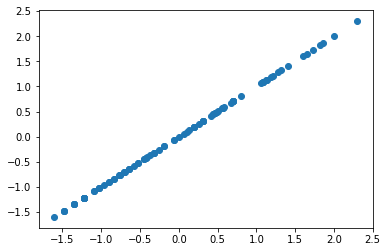

In [336]:
plt.scatter(y_test, y_pred)

In [337]:
mpg_df_scaled.corr()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_American,origin_Asian,origin_Europe
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.759207,-0.568192,0.442174,0.259022
cyl,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.912577,0.604351,-0.396479,-0.352861
disp,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.855141,0.651407,-0.433505,-0.373886
hp,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.701399,0.485418,-0.318972,-0.282877
wt,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.815445,0.598398,-0.440817,-0.298843
acc,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.385187,-0.250806,0.109144,0.204473
yr,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.305194,-0.139883,0.193101,-0.024489
car_type,0.759207,-0.912577,-0.855141,-0.701399,-0.815445,0.385187,0.305194,1.000000,-0.624215,0.392758,0.382010
origin_American,-0.568192,0.604351,0.651407,0.485418,0.598398,-0.250806,-0.139883,-0.624215,1.000000,-0.643317,-0.597198
origin_Asian,0.442174,-0.396479,-0.433505,-0.318972,-0.440817,0.109144,0.193101,0.392758,-0.643317,1.000000,-0.229895


In [338]:
X = mpg_df_scaled.drop('mpg', axis=1)
X = X.drop('acc', axis=1)
X = X.drop('origin_American', axis=1)
X = X.drop('origin_Asian', axis=1)
X = X.drop('origin_Europe', axis=1)
X = X.drop('car_type', axis=1)

In [339]:
X.head()

,cyl,disp,hp,wt,yr
0,1.498191,1.090604,0.673118,0.630870,-1.627426
1,1.498191,1.503514,1.589958,0.854333,-1.627426
2,1.498191,1.196232,1.197027,0.550470,-1.627426
3,1.498191,1.061796,1.197027,0.546923,-1.627426
4,1.498191,1.042591,0.935072,0.565841,-1.627426


In [340]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [341]:
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [342]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))


The coefficient for cyl is -0.022969477795430654
The coefficient for disp is 0.12401686933900509
The coefficient for hp is -0.05344468782365348
The coefficient for wt is -0.770957141336008
The coefficient for yr is 0.3767454014273224


In [343]:
regression_model.score(X_test, y_test)

0.8286312223792714

In [344]:
y_pred = regression_model.predict(X_test)

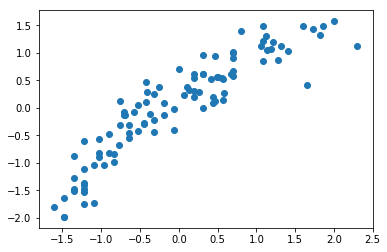

In [345]:
plt.scatter(y_test, y_pred)